In [34]:
import fix_sys_path
from plasma_classes import *
from plasma_utils import *
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

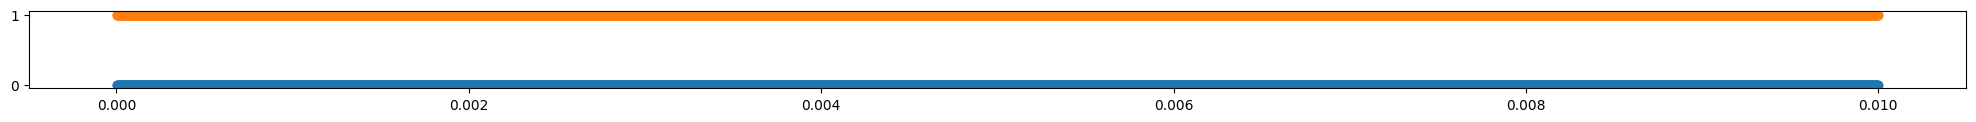

In [35]:
L = 1e-2
N_x = 200
N_p = 5000
h = L/N_x
tau = 2e-13
n0 = 1e17
n1 = n0*N_x/N_p
q = 1.60217e-19
m_e = 9.1093837e-31
m_i = 1.672e-27#*131
epsilon = 8.85e-12
eV = 11600
E1_factor = 1.60218e-19
E1 = 18.3*E1_factor
alpha = 0.62
T_e = eV*20
T_i = 600
k_b = 1.38e-23
v_t_e = math.sqrt(3*k_b*T_e/m_e)
vmin_e = -3*v_t_e
vmax_e = 3*v_t_e
v_t_i = math.sqrt(3*k_b*T_i/m_i)
vmin_i = -3*v_t_i
vmax_i = 3*v_t_i
r_d = math.sqrt(epsilon * k_b * T_e / (q * q * n0));
r_d
h
ions = Particles(N_p, n1, q, m_i)
electrons = Particles(N_p, n1, -q, m_e)
nodes = Nodes(N_x)
left_wall = Wall(0, L/10, 0, h, "left")
right_wall = Wall(9*L/10, L, 0, h, "right")
set_homogeneous(electrons, 0, L)
set_homogeneous(ions, 0, L)
fig, ax = plt.subplots(1, 1)
ax.scatter(electrons.x, np.zeros(electrons.x.shape))
ax.scatter(ions.x, np.ones(ions.x.shape))
fig.set_size_inches((25, 1))
electrons.normalise(h, tau)
ions.normalise(h, tau)
e_integral = get_integral(Maxwell(T_e, k_b, m_e), vmin_e, vmax_e, 100000)
i_integral = get_integral(Maxwell(T_i, k_b, m_i), vmin_i, vmax_i, 100000)

In [ ]:
def range_mask(particles, n_range, nodes=None):
    """
    generates boolean mask for particles in range
    args:
    particles : sets of macroparticles
    n_range = neutral range
    nodes: spatial grid of nodes
    """

    mask = (particles.x >= n_range[0]) & (particles.x <= n_range[1])
    return mask

def range_coordinates(n_range, mask):
    """
    generates random coordinates range
    args:
    particles : sets of macroparticles
    n_range = neutral range
    """
    center = (n_range[1] + n_range[0])/2
    base = (n_range[1] - n_range[0])/2
    shift = base*(2*np.random.rand(np.sum(mask)) - 1)
    coordinates = center + shift
    return coordinates

In [36]:
def constant_flux(particles, N, integral, h, tau, n_range):
    mask = range_mask(particles, n_range)
    slc = particles[mask]
    if slc.n_macro < N:
        new_particles = (N - slc.n_macro, particles.q, particles.m)
        new_particles.normalised = particles.normalised
        new_particles.x = range_coordinates(n_range, mask)
        set_distr(new_particles, integral, h, tau)
        particles.add(new_particles)

In [38]:
n_range = (50, 150)

In [39]:
mask, coordinate = generate_range(electrons, n_range, nodes)

In [40]:
np.sum(mask)

2500

(array([243., 241., 250., 264., 240., 266., 222., 254., 256., 264.]),
 array([ 50.01453691,  60.01255617,  70.01057542,  80.00859468,
         90.00661393, 100.00463319, 110.00265244, 120.0006717 ,
        129.99869095, 139.99671021, 149.99472947]),
 <BarContainer object of 10 artists>)

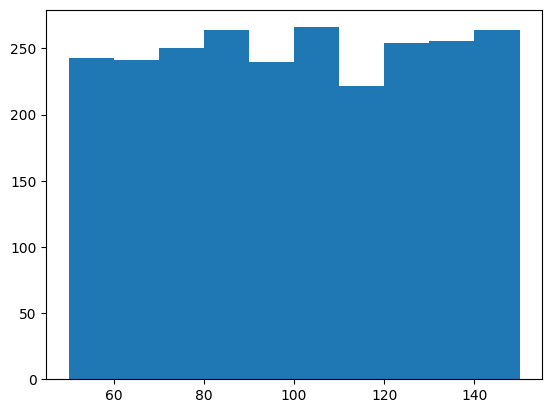

In [42]:
plt.hist(coordinate)